### 1. importing libs

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 2. Data Preprocessing

In [163]:
data = pd.read_csv('insurance_claims.csv')

#### 2.1 understanding the data  

In [164]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


View some rows from the dataset to understand what the data looks like and understand the features

In [165]:
data_shape=data.shape
data_shape

(1000, 40)

the data have 1000 rows and 40 columns 

In [166]:
missing_data = data.isnull().sum()
missing_data

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There is one row with a null entry, and another row with 91 null values. Since 91 missing values is a significant amount, the null values will be replaced with the mode.

In [167]:
data_dis=data.describe()
data_dis

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


to generate statistics summary  for numerical columns in the DataFrame for more understanding

In [168]:
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

for quick overview of the structure of the data

In [169]:

mode_value = data["authorities_contacted"].mode()[0]  
data["authorities_contacted"].fillna(mode_value, inplace=True)


missing_data_replaced = data.isnull().sum()
missing_data_replaced

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

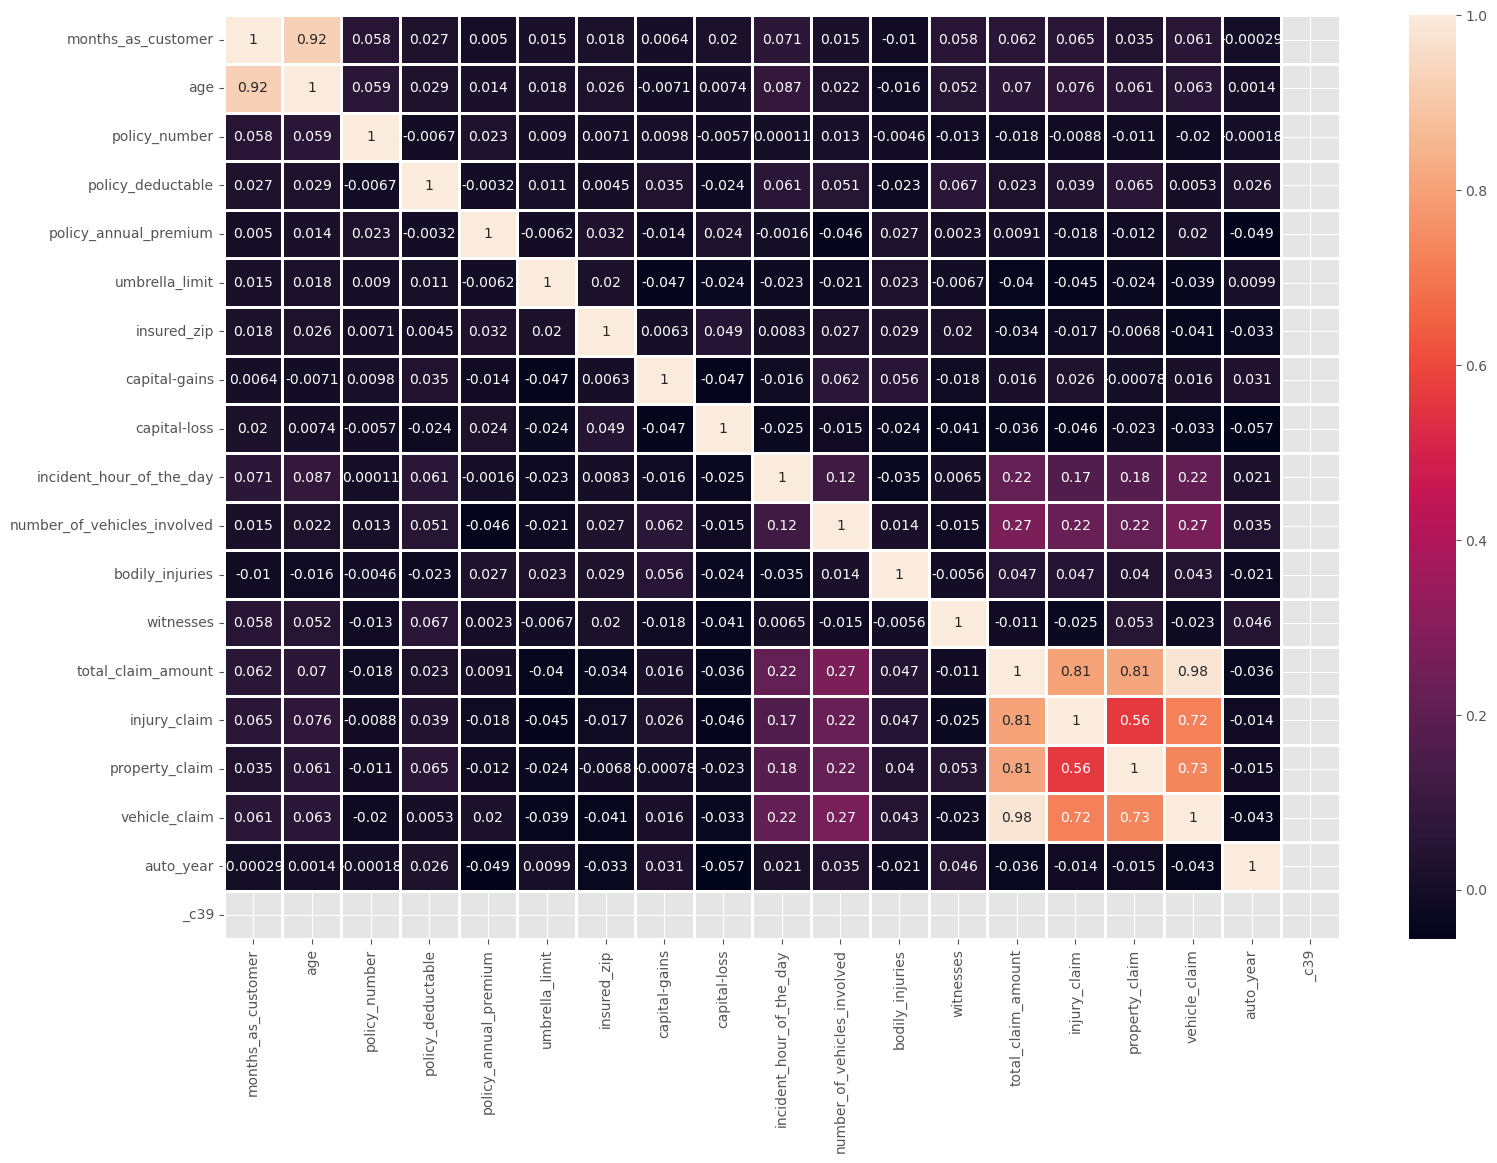

In [170]:
numeric_data = data.select_dtypes(include=['number', 'float64', 'int64'])

corr = numeric_data.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(data=corr, annot=True, fmt='.2g', linewidth=1)
plt.show()


In [171]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [172]:

columns_to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39','age','total_claim_amount']

data.drop(columns_to_drop, inplace = True, axis = 1)
data.shape
data.head()


,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,?,0,0,?,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,?,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [173]:
X = data.drop('fraud_reported', axis = 1)
y = data['fraud_reported']

In [174]:
categorical_data=X.select_dtypes(include=['object'])
for col in categorical_data.columns:
    print(f"{col}: \n{categorical_data[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' '?' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' '?' 'NO']

police_report_available: 
['YES' '?' 'NO']



In [175]:
categorical_data = pd.get_dummies(categorical_data, drop_first = True)
categorical_data.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,True,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,True,False


In [176]:
num_data = X.select_dtypes(include = ['int64'])
num_data.shape
num_data.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [177]:
X = pd.concat([num_data,categorical_data], axis = 1)
X.shape
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,False,False,False,False,True,False,True,False,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,True,False,False,False,False,True,False,False,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,True,False,False,False,False,True,True,False,True,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,False,False,False,False,True,False,False,True,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,True,False,False,False,False,True,True,False,True,False


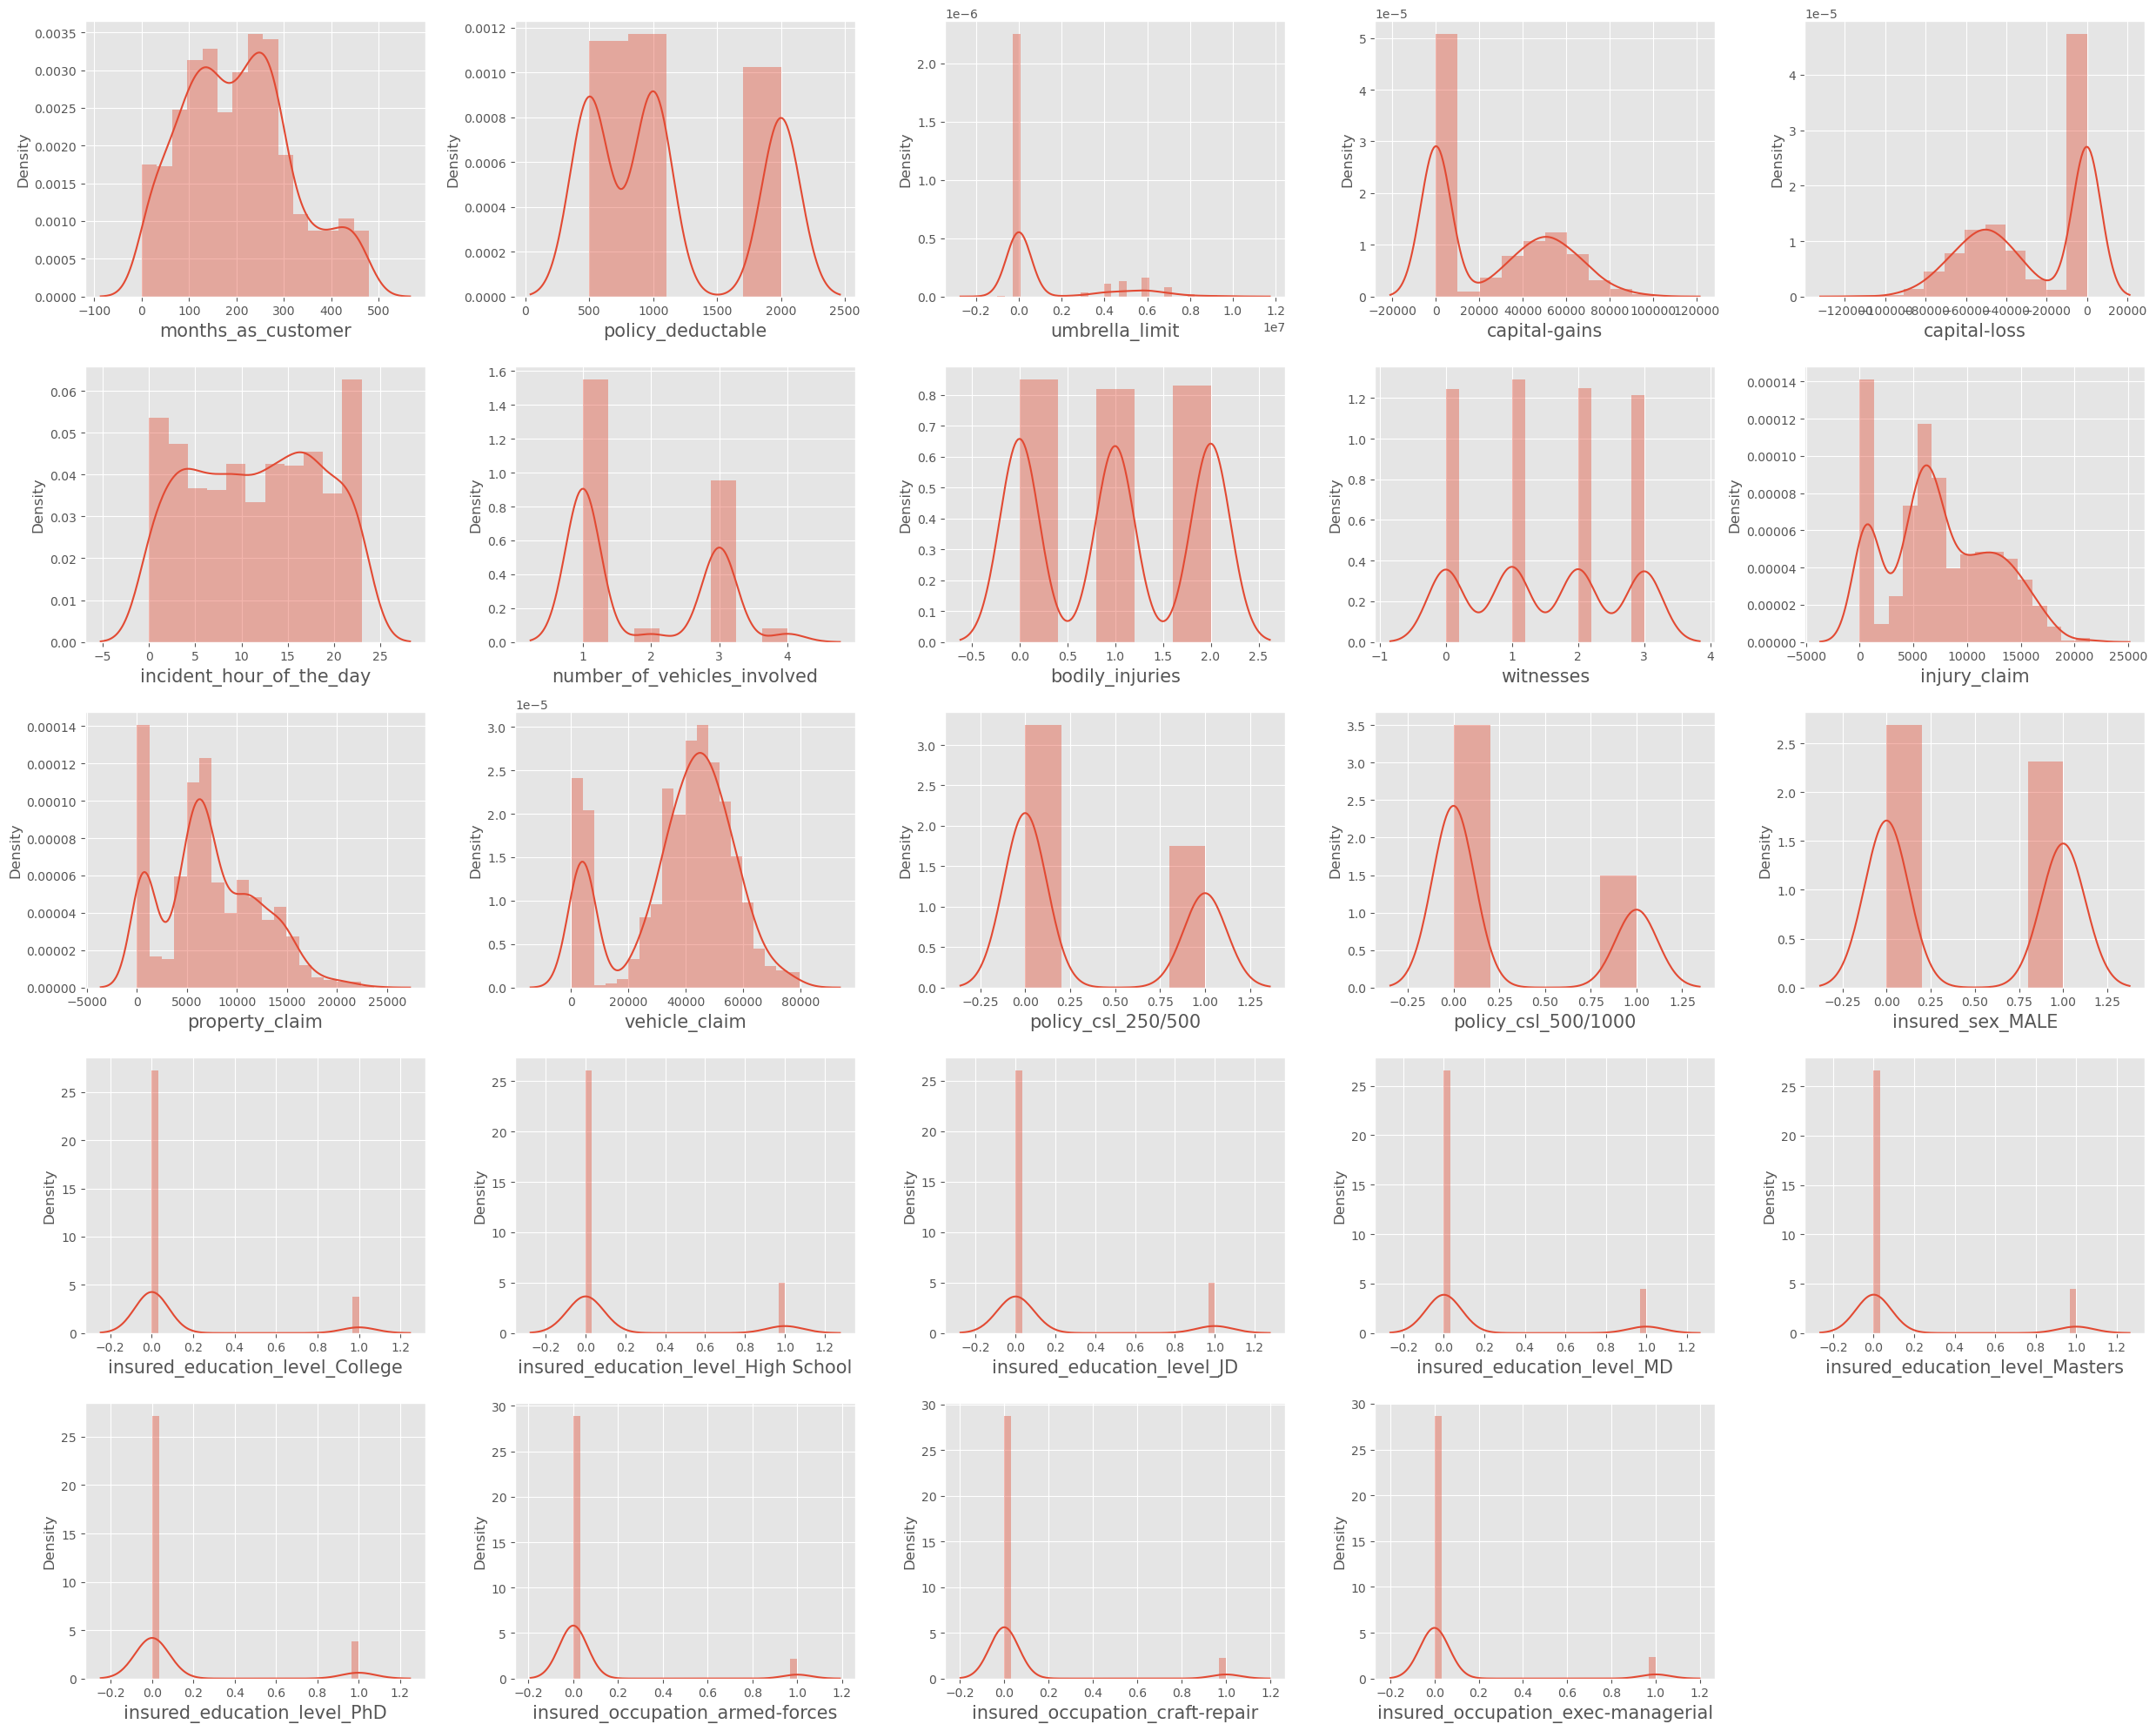

In [178]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [180]:
num_data = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [181]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train[num_data.columns])
scaled_num_data = pd.DataFrame(scaled_data, columns=num_data.columns, index=X_train.index)
scaled_num_data.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
353,2.391523,-1.037699,-0.488431,1.531139,-2.011378,1.213394,-0.819415,-1.183275,0.450674,-0.198123,1.135761,1.077788
578,1.863632,-0.226204,-0.488431,0.920936,0.951296,0.492744,0.157533,0.038170,1.358832,0.080974,0.069844,-0.152416
881,1.714063,1.396785,-0.488431,1.488065,-0.818474,0.925134,-0.819415,0.038170,1.358832,-0.846615,-0.174860,-0.612479
572,-0.881402,1.396785,-0.488431,1.606517,-0.747256,-1.525075,1.134481,1.259615,1.358832,1.419000,1.421941,0.643255
428,-0.318318,-0.226204,-0.488431,-0.888137,-0.416092,1.501654,1.134481,-1.183275,-1.365643,0.255410,0.246115,0.745905


In [182]:
X_train.drop(columns = scaled_num_data.columns, inplace = True)

In [183]:
X_train = pd.concat([scaled_num_data, X_train], axis = 1)
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
353,2.391523,-1.037699,-0.488431,1.531139,-2.011378,1.213394,-0.819415,-1.183275,0.450674,-0.198123,...,True,False,False,False,False,True,False,False,True,False
578,1.863632,-0.226204,-0.488431,0.920936,0.951296,0.492744,0.157533,0.038170,1.358832,0.080974,...,False,True,False,False,False,True,False,True,False,True
881,1.714063,1.396785,-0.488431,1.488065,-0.818474,0.925134,-0.819415,0.038170,1.358832,-0.846615,...,False,False,False,True,False,False,False,False,False,True
572,-0.881402,1.396785,-0.488431,1.606517,-0.747256,-1.525075,1.134481,1.259615,1.358832,1.419000,...,False,False,False,False,False,False,True,False,False,False
428,-0.318318,-0.226204,-0.488431,-0.888137,-0.416092,1.501654,1.134481,-1.183275,-1.365643,0.255410,...,False,False,False,False,False,False,False,False,True,False


In [184]:
scaled_test_data = scaler.transform(X_test[num_data.columns])
scaled_num_data_test = pd.DataFrame(scaled_test_data, columns=num_data.columns, index=X_test.index)


In [185]:
X_test.drop(columns = num_data.columns, inplace = True)
X_test = pd.concat([scaled_num_data_test, X_test], axis = 1)

In [186]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [187]:
y_pred = log_reg.predict(X_test)

In [191]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print( classification_report(y_test, y_pred))

Accuracy: 0.845

Confusion Matrix:
 [[147  10]
 [ 21  22]]
              precision    recall  f1-score   support

           N       0.88      0.94      0.90       157
           Y       0.69      0.51      0.59        43

    accuracy                           0.84       200
   macro avg       0.78      0.72      0.75       200
weighted avg       0.83      0.84      0.84       200



In [ ]:
print(data['fraud_reported'].value_counts(normalize=True) * 100)

fraud_reported
N    75.3
Y    24.7
Name: proportion, dtype: float64
